# EE 595 Assignment 2

* Student: John Rizzo
* Teacher: Shucheng Yu
* Assignment: EE 595 Assignment 2
* Due: 5/26/25

Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt).  Assume a linear model: y = w_0 + w_1 * x.

## Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
RANDOM=42

## 1) Plot the data (i.e. x-axis for the 1st column, y-axis for the 2nd column)

In [4]:
# Load the data from data2.txt
data = pd.read_csv('data2.txt')
data.shape

# Extract the x and y values from the data
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

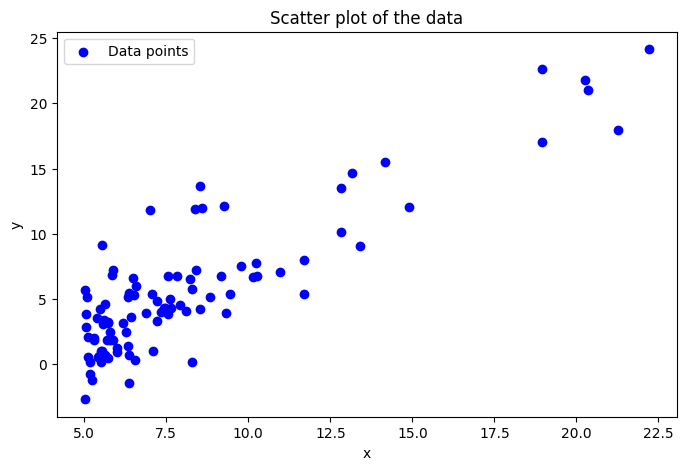

In [5]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data points') # type: ignore
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data')
plt.legend()
plt.show()

## 2) Use the Normal equation to find the coefficients.

The Normal Equation is: w = (X^T X)^(-1) X^T y

This is a closed form analytical solution for determining the coefficients of a linear regression model.

In [6]:
# Add a column of ones to x for the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Compute the coefficients using the Normal equation: w = (X^T X)^(-1) X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"w_0 (intercept): {w[0]}")
print(f"w_1 (slope): {w[1]}")

w_0 (intercept): -4.211504005424098
w_1 (slope): 1.2135472539083594


## 3) Use Gradient Descent using batch and stochastic modes respectively

* Split the dataset into 80% for training and 20% for testing.
* Plot MSE vs iteration of the batch mode for both training set and testing set (in the same figure).  (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)
* Repeat the previous step using the stochastics mode.
* Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence.
* Change the learning rate and plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01). Based on the plot, determine the best learning rate.

Do not use the fit() function in the scikit-learn library.  You need to implement the algorithm yourself.

In [7]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### a) Split the dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM)

In [10]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.01, max_iter=500, tol=1e-6):
    w = np.zeros(X.shape[1])
    mse_history_train = []
    mse_history_test = []
    for i in range(max_iter):
        y_pred = X @ w
        grad = -2 * X.T @ (y - y_pred) / len(y)
        w -= lr * grad
        mse_train = mse(y, y_pred)
        mse_history_train.append(mse_train)
        # For test set, use global X_test, y_test
        mse_history_test.append(mse(y_test, X_test @ w))
        if np.linalg.norm(grad) < tol:
            break
    return w, mse_history_train, mse_history_test

In [11]:
# Run batch mode
w_batch, mse_train_batch, mse_test_batch = batch_gradient_descent(X_train, y_train, lr=0.01, max_iter=500)

In [12]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.01, max_iter=500, tol=1e-6):
    w = np.zeros(X.shape[1])
    mse_history_train = []
    mse_history_test = []
    n = len(y)
    for i in range(max_iter):
        idx = np.random.permutation(n)
        for j in idx:
            xi = X[j]
            yi = y[j]
            y_pred = xi @ w
            grad = -2 * xi * (yi - y_pred)
            w -= lr * grad
        mse_train = mse(y, X @ w)
        mse_history_train.append(mse_train)
        mse_history_test.append(mse(y_test, X_test @ w))
        if np.linalg.norm(grad) < tol:
            break
    return w, mse_history_train, mse_history_test

In [13]:
# Run stochastic mode
w_sgd, mse_train_sgd, mse_test_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, max_iter=500)

### b) Plotting MSE vs Iteration for Batch mode

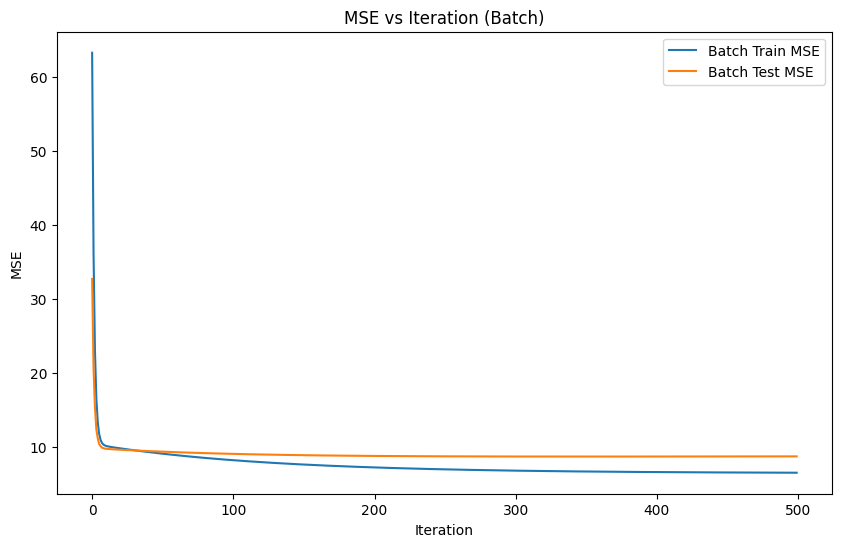

In [17]:
plt.figure(figsize=(10,6))
plt.plot(mse_train_batch, label='Batch Train MSE')
plt.plot(mse_test_batch, label='Batch Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration (Batch)')
plt.legend()
plt.show()

### c) Plotting MSE vs Iteration for Stochastics mode

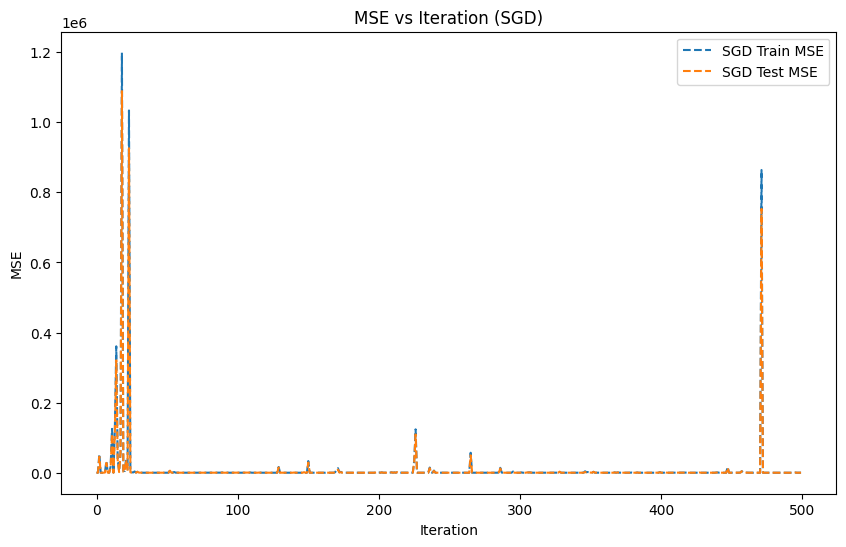

In [20]:
plt.figure(figsize=(10,6))
plt.plot(mse_train_sgd, label='SGD Train MSE', linestyle='--')
plt.plot(mse_test_sgd, label='SGD Test MSE', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration (SGD)')
plt.legend()
plt.show()

### d) Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence

In [21]:
# Compare accuracy and speed of convergence
print(f"Batch Test MSE (final): {mse_test_batch[-1]:.4f}")
print(f"SGD Test MSE (final): {mse_test_sgd[-1]:.4f}")
print(f"Batch iterations: {len(mse_train_batch)}")
print(f"SGD iterations: {len(mse_train_sgd)}")

Batch Test MSE (final): 8.7145
SGD Test MSE (final): 84.3300
Batch iterations: 500
SGD iterations: 500


Initially SGD is more varied in terms of MSE and again periodically.  The batch mode is more stable and converges faster.

### e) Change learning rate and plot MSE of the testing set vs learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01). Based on the plot, determine the best learning rate.

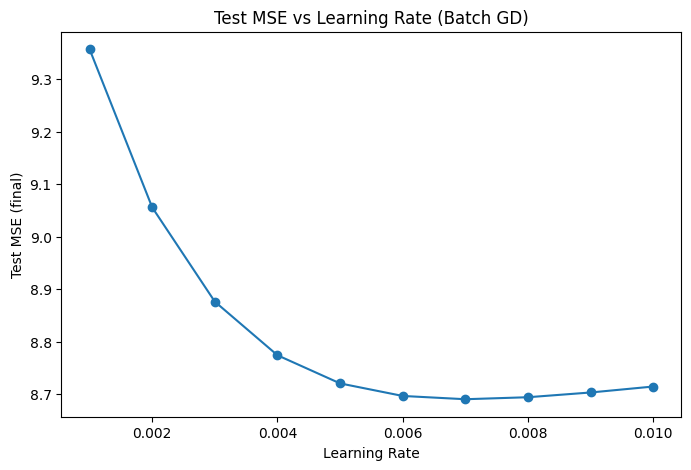

Best learning rate: 0.007


In [22]:

# Learning rate sweep
lrs = np.arange(0.001, 0.011, 0.001)
test_mses = []
for lr in lrs:
    _, _, mse_test = batch_gradient_descent(X_train, y_train, lr=lr, max_iter=500)
    test_mses.append(mse_test[-1])

plt.figure(figsize=(8,5))
plt.plot(lrs, test_mses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test MSE (final)')
plt.title('Test MSE vs Learning Rate (Batch GD)')
plt.show()

best_lr = lrs[np.argmin(test_mses)]
print(f"Best learning rate: {best_lr:.3f}")

You can visually see that the minimum learning rate is between 0.006 and 0.008 which agrees with the minimum learning rate used to run batch gradient descent.